In [14]:
import document_generator as dg
import pandas as pd
import json
import requests
import random
import time

In [15]:
#функция для тестирования
def new_document():
    url = 'http://127.0.0.1:5000/listener'
    document = dg.Generator().generate_document()
    return requests.post(url, json=document).text

In [17]:
time_list = []

In [42]:
while True:
    start_time = time.time()
    new_document()
    end_time = time.time()
    execution_time = end_time - start_time
    time_list.append(execution_time)
    if (len(time_list)) > 50000:
        break

In [37]:
import sqlite3

# Подключаемся к базе данных (или создаем её)
conn = sqlite3.connect('vk.db')

# Создаем курсор
cursor = conn.cursor()

cursor.execute("SELECT * FROM T_Documents tod")
bd = pd.DataFrame(cursor.fetchall(), columns=[description[0] for description in cursor.description])

# Закрываем соединение
conn.close()

In [38]:
bd

,Url,FetchTime,PubDate,Text,FirstFetchTime
0,xqjxcF6kiPI2,1391657160,980454000,"А также действия представителей оппозиции, вне...",980454000
1,ToYp35ylgetR,1699918740,658020120,"Господа, высокотехнологичная концепция обществ...",658020120
2,tI058vpDGaln,981734100,981734100,"Приятно, граждане, наблюдать, как ключевые осо...",981734100
3,nY6J12kM2UKR,1005007740,978589680,"В частности, консультация с широким активом не...",978589680
4,O0WkV6wQm291,1555481400,652103760,Предварительные выводы неутешительны: понимани...,652103760
...,...,...,...,...,...
1306,KbFmnF9LmQ6Q,1009348740,1009348740,Каждый из нас понимает очевидную вещь: сложивш...,1009348740
1307,J0NtlxKt3E4N,1000043580,1000043580,"Разнообразный и богатый опыт говорит нам, что ...",1000043580
1308,dIpUHO7T5Y0s,985312200,985312200,"Наше дело не так однозначно, как может показат...",985312200
1309,ry1GEWfmYKlF,1008706620,1008706620,"Но интерактивные прототипы, вне зависимости от...",1008706620


<Axes: >

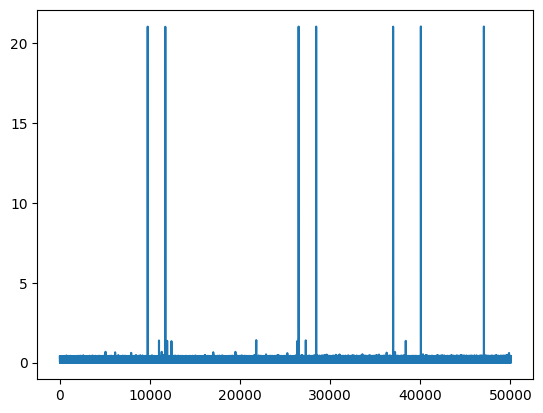

In [39]:
sns.lineplot(time_list)

In [40]:
pd.Series(time_list).describe()

count    50042.000000
mean         0.228424
std          0.304601
min          0.001839
25%          0.007972
50%          0.351040
75%          0.370856
max         21.060777
dtype: float64